## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusion](#conclusions)
- [Resources](#resources) 



<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [5]:
file_path='C:/Users/israa_salah/Desktop/isalah/DataAnalysisCourse/Projects/Project2/AnalyzeABTestResults 2/'
#df_countries=pd.read_csv(file_path+'countries.csv')
df=pd.read_csv(file_path+'ab_data.csv')

b. Use the below cell to find the number of rows in the dataset.

In [6]:
df.shape[0]

294478

There are 294478 rows

c. The number of unique users in the dataset.

In [7]:
(df['user_id'].nunique())

290584

There is 290584 users

d. The proportion of users converted.

In [8]:
((df['user_id'][df['converted']==1]).nunique())/(df['user_id'].nunique())

0.12104245244060237

Portion of converted users: 0.12104245244060237 / 12.104%

e. The number of times the `new_page` and `treatment` don't line up.

In [9]:
df_A_not_B=df[(df['landing_page']!='new_page')&(df['group']=='treatment')]
df_B_not_A=df[(df['landing_page']=='new_page')&(df['group']!='treatment')]


In [10]:
len(df_A_not_B)

1965

In [11]:
len(df_B_not_A)

1928

In [12]:
len(df_A_not_B) + len(df_B_not_A)

3893

There is 3893 times new_page & treatment don't lineup. My assumption is based on the two cases of the mismatch. 

f. Do any of the rows have missing values?

In [13]:
df[df.isnull().any(axis=1)]


,user_id,timestamp,group,landing_page,converted


No rows has null/missing values

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [188]:
df1 = df.drop(df[(df['group'] == 'treatment') & (df['landing_page'] != 'new_page')].index)
df2=  df1.drop(df[(df['group'] == 'control') & (df['landing_page'] != 'old_page')].index)

In [189]:
df1

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [190]:
df2

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [191]:
len(df1)

292513

In [192]:
len(df2)

290585

df1 is 292513 rows vs df2 after removing duplicates is 290585

In [193]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

Confirmed correct rows were removed, and will use df2 coming forward. 

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [194]:
df2.user_id.nunique()

290584

There's 290584 unique users in df2

b. There is one **user_id** repeated in **df2**.  What is it?

In [195]:
df2[df2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


User with **user_id** <u>**773192**</u> repated twice in df2.

c. What is the row information for the repeat **user_id**? 

Rows **1899** and **2893** can be checked for **user_id** <u>**773192**</u>.

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [196]:
len(df2)

290585

In [197]:
df2.drop(index=2893,inplace=True)

In [198]:
len(df2)

290584

Removed duplicate line <u>**2893**</u>, and confirmed it by knowing the size of df2. Before dropping the duplicate line: 290585, and df2 size is 290584 after dropping the duplicate line. 

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [199]:
df2[df2.converted == 1].shape[0]/df2.shape[0]

0.11959708724499628

In [200]:
df2['converted'].mean()

0.11959708724499628

**Probability** of an <u>**individual converting regardless of the received page**</u>: **0.11959708724499628**<br>
Note: Verified the output by two different methods using mean and manualy.

b. Given that an individual was in the `control` group, what is the probability they converted?

In [201]:
df2[(df2.converted == 1)&(df2.group == 'control')].shape[0]/df2[df2.group == 'control'].shape[0]

0.1203863045004612

In [202]:
df2.groupby(['group']).mean()

,user_id,converted
group,,
control,788164.072594,0.120386
treatment,787845.719290,0.118808


**Probability** of an <u>**individual in control group converting regardless of the received page**</u>: **0.1203863045004612**<br>
Note: Verified the output by two different methods using mean and manualy.

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [203]:
df2[(df2.converted == 1)&(df2.group == 'treatment')].shape[0]/df2[df2.group == 'treatment'].shape[0]

0.11880806551510564

**Probability** of an <u>**individual in treatment group converting regardless of the received page**</u>: **0.11880806551510564**<br>
Note: Verified the output by two different methods using mean and manualy.

d. What is the probability that an individual received the new page?

In [204]:
df2['user_id'][df2['landing_page'] == 'new_page'].nunique()/df2['user_id'].nunique()

0.5000619442226688

**Probability** of receiving **new_page** is **0.5000619442226688**

In [205]:
df2['user_id'][(df['converted'] ==1)&(df2['landing_page']=='new_page')].nunique()/df2['user_id'][df2['landing_page']=='new_page'].nunique()

0.11880806551510564

Regardles of the group, the **probability** of the user who **recived new_page** to **convert** is **0.11880806551510564** 

In [206]:
df2['user_id'][(df['converted'] ==1)&(df2['landing_page']=='old_page')].nunique()/df2['user_id'][df2['landing_page']=='old_page'].nunique()

0.1203863045004612

Regardles of the group, the **probability** of the user who **recived old_page** to convert is **0.1203863045004612**

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

<u>**Notes taken earlier:**</u><br>
- There is **290584 users**<br>
- **Probability** of an <u>**individual converting regardless of the received page**</u>: **0.11959708724499628**<br> 
- **Probability** of an <u>**individual in control group converting regardless of the received page**</u>: **0.1203863045004612** <br>
- **Probability** of an <u>**individual in treatment group converting regardless of the received page**</u>: **0.11880806551510564**<br>
- **Probability** of receiving **new_page** is **0.5000619442226688**<br>
- Regardles of the group, the **probability** of the user who **recived new_page** to **convert** is **0.11880806551510564**<br>
- Regardles of the group, the **probability** of the user who **recived old_page** to convert is **0.1203863045004612**

<u>**Based on the notes above:**</u><br>
>- No evidence supports the claim that new_page will lead to more rates of conversion. 
>- The test is well designed in terms of the number of users  **290584 users**, and the fact that **half of the users** received the **new_page**, and accordingly 50% of the users received the **old_page**.<br>
>- Around 11.88% of the users who received new_page convert, that's regardless of the group the user belongs to.
>- 12.04% that received the old_page were converted. In conclusion, the new_page did not increase the conversion rate.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


- <u>**Null hypothesis:**</u>
The conversion rate of the old_page is greater than or equal to the conversion rate of the new_page.<br>
>**$H_{null}$** : **$p_{old}$**>= **$p_{new}$**<br>



- <u>**Alternative hypothesis:**</u>
The conversion rate of the old_page is less than the conversion rate of the new_page. 
>**$H_{alternative}$** : **$p_{old}$**<**$p_{new}$**<br>

Note:
>We use sample data to check if **null hypothesis** is valid. If the **null hypothesis** claim isn’t valid, then the  **alternative hypothesis** will be used instead.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

Null hypothesis assumes no difference between the conversion rates of old and new page.Accordingly the whole dataset is used to calculate **$p_{new}$**. 

In [207]:
df2[df2.converted == 1].shape[0]/df2.shape[0]

0.11959708724499628

In [208]:
P_new=df2['converted'].mean()
P_new

0.11959708724499628

Accordingly $p_{new}$ under the null = 0.1195971

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

Null hypothesis assumes no difference between the conversion rates of old and new page.Accordingly the whole dataset is used to calculate **$p_{old}$**. 

In [209]:
P_old=df2['converted'].mean()
P_old

0.11959708724499628

Accordingly $p_{old}$ under the null = 0.1195971

c. What is $n_{new}$?

$n_{new}$ is the number of users who landed **new_page**. i.e **landing_page == new_page**

In [210]:
df2[df2['landing_page']=='new_page']

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
...,...,...,...,...,...
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,0
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,0
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,0
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0


In [211]:
n_new=len(df2[df2['landing_page']=='new_page'])
n_new

145310

In [212]:
n_new/len(df2)

0.5000619442226688

Number of **users** who landed on **new_page** is **145310**. Around 50% (exactly 50.0062%) of the users landed on the new page.  

d. What is $n_{old}$?

$n_{old}$ is the number of users who landed **old_page**. i.e **landing_page == old_page**

In [213]:
df2[df2['landing_page']=='old_page']

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
...,...,...,...,...,...
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0


In [214]:
n_old=len(df2[df2['landing_page']=='old_page'])
n_old

145274

In [215]:
n_old/len(df2)

0.4999380557773312

Number of **users** who landed on **old_page** is **145274**. Around 50% (exactly 49.9938%) of the users landed on the new page.  

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [228]:
new_page_converted = np.random.binomial(1,P_new,n_new)
new_page_converted.mean()
#new_page_converted = np.random.choice([1, 0], size=n_new, p=[P_new, 1-P_new])
#new_page_converted.mean()


0.1219393021815429

Note: Decided to use bionomial instead of random to avoid long run time, later on. 

$n_{new}$ transactions with a convert rate of $p_{new}$ under the null (new_page_converted) is 0.121

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [229]:
old_page_converted = np.random.binomial(1,P_old,n_old)
old_page_converted.mean()

0.11987692222971763

$n_{old}$ transactions with a convert rate of $p_{old}$ under the null (old_page_converted) is 0.1198

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [230]:
new_page_converted.mean() - old_page_converted.mean()

0.0020623799518252744

I got error ValueError: operands could not be broadcast together with shapes (145310,) (145274,) on subtraction.
As both operands have different size, I decided to use mean. <br>
$p_{new}$ - $p_{old}$  = 0.00206

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

Running simmulation 10 K times

In [231]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.binomial(1,P_new,n_new).mean()
    old_page_converted = np.random.binomial(1,P_old,n_old).mean()
    p_diffs.append(new_page_converted - old_page_converted)

In [232]:
p_diffs

[-0.0017364411259048335,
 -0.0002500338594485507,
 -0.00029800549735539694,
 0.0009616933233364544,
 0.0016429083932755495,
 0.0020766228389845764,
 -0.0019843919683171923,
 0.0006171733336221563,
 0.0007549141378549173,
 0.0020832795687207722,
 5.064859807960009e-06,
 -0.0014749909384827176,
 0.001959266629332726,
 0.00025240347370728,
 -0.0010620754927269244,
 -0.0007109175323673639,
 0.0003005951045895461,
 0.0015811236219288732,
 0.0009546835816164334,
 -0.0015576343977992124,
 0.0010783827325743789,
 -0.00036024048688435006,
 0.0015948190847074328,
 -0.002280425297810057,
 -0.0009106170558808718,
 0.0005556153767385247,
 0.00036270901271343026,
 0.0014090384276917445,
 0.0018700141906933115,
 -0.000972371130533306,
 0.00048660257606829294,
 0.002076496641463782,
 -0.0005182516257805359,
 -0.0021014923721836554,
 0.0002043380403457945,
 0.0008929175693606767,
 -0.0005731051025147094,
 -0.0011997480820835627,
 0.0002800178029836453,
 -0.00031867147830022535,
 0.0009476704291525861,


It took 3 minutes to run the p_diffs

<u>Converting p_diffs to numpy array:</u>

In [233]:
p_diffs=np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

<u>Plotting sample distribution of p_diffs:</u>

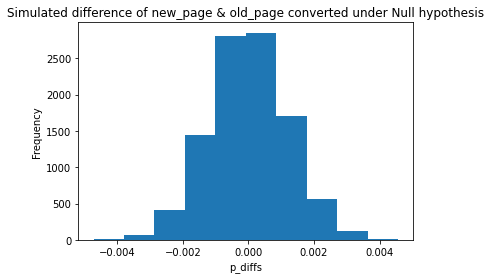

In [234]:
plt.hist(p_diffs);
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Simulated difference of new_page & old_page converted under Null hypothesis');

The plot is what I expected as it's normal distribution, also p_new and p_old has close/almost identical values. 

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

Will dedicate df to control group (df_control) & treatment group (df_treatment). Will store the difference between the conversion mean of both groups in obs_diff.

In [235]:
df_control = df2[df2['group'] == "control"]
df_treatment = df2[df2['group'] == "treatment"] 
obs_diff = df_treatment.converted.mean() - df_control.converted.mean()
obs_diff

-0.0015782389853555567

The actual difference **obs_diff** is **-0.0015782389853555567**

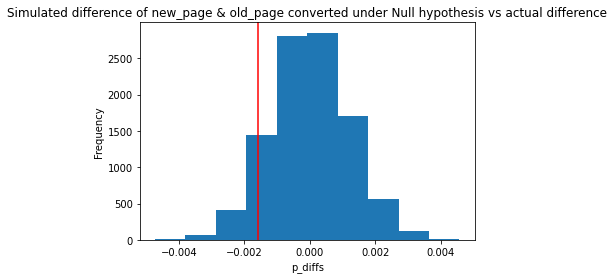

In [236]:
plt.hist(p_diffs);
plt.xlabel('p_diffs');
plt.ylabel('Frequency');
plt.title('Simulated difference of new_page & old_page converted under Null hypothesis vs actual difference');
plt.axvline(obs_diff, color='red');

In [237]:
p_diffs = np.array(p_diffs)
p_val = (p_diffs > obs_diff).mean()
p_val

0.9083

p_val is 0.9083

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

0.9083 is the proportion of p_diffs "**p_diffs**", and is the greater than the actual difference "**obs_diff**" -0.15 observed in ab_data.csv. The calculated **p_val** above is 0.9083, greater than 0.05. Accordingly, There is no significant conversion rate between the new and old pages, and I will <u>continue with</u> **null hypothesis**. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [245]:
import statsmodels.api as sm

convert_old = len(df2[(df2["landing_page"] == "old_page")&(df2["converted"] == 1)])
convert_new =  len(df2[(df2["landing_page"] == "new_page")&(df2["converted"] == 1)])
n_old = len(df2[df2["landing_page"] == "old_page"])
n_new = len(df2[df2["landing_page"] == "new_page"])
#
#convert_old = len(df2[(df2["group"] == "control")&(df2["converted"] == 1)])
#convert_new =  len(df2[(df2["group"] == "treatment")&(df2["converted"] == 1)])
#n_old = len(df2[df2["group"] == "control"])
#n_new = len(df2[df2["group#"] == "treatment"])

For testing purposes I tested convert_old and convert_new, n_old and n_new using groups and landing page, and got the same value. 

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [246]:
z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old], [n_new,n_old], alternative='larger')

z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

z_test score **z_score** is -1.3109 vs p_value **0.905**,which is close the value calculated earlier p_val.

**Note:**
> The link shared [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is corrupt and throws error.
> Instead I used [Here](https://medium.com/@wengsengh/a-b-testing-in-web-page-version-d033276466c3)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Z-score:**
>- Z-score is the number of standard deviations a given data point lies from the mean. 
>- With 95% confidence interval for the standard normal distribution, then critical z-score values, is the interval (-1.96, +1.96). As the calculated z_score is -1.3 lies between the interval, it's standard deviation, and the p-value is larger than 0.05. p_value = 0.905. 

**P-value:**
>- P-value is a conditional probability - that is it is the probability of getting the data observed or more extreme data if the null hypothesis is true.
>- As  p_value = 0.905, there is a large probability that the null hypothesis was falsesly rejected. 
>- As we failed to reject the null hypothesis, the new_page will have less or equal conversion rate to the old_page. 

<u>**Based on the finding in j & k:**</u><br>
The **null hypothesis** can not be rejected based on **z_score** and the **p_value** mean. Z-Score and P-Value confirms the previous findings. The new_page will not lead to more conversion rate. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression**, as the dependent variable "converted" is a binary variable (1 vs 0).

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [247]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [248]:
df2['intercept'] = 1
df2[['drop', 'ab_page']] = pd.get_dummies(df2['group'])
df2.drop('drop', axis=1, inplace=True)



In [249]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [261]:
len(df2[df2['group']=='control'])

145274

In [262]:
len(df2[df2['group']=='treatment'])

145310

145274 users in control group, and 145310 in treatment group. 

In [260]:
bucket_group=df2.groupby(['group','ab_page']).apply(lambda x: pd.Series({"Group/ab_page": ((x['ab_page']).count())}))    
bucket_group

,,Group/ab_page
group,ab_page,
control,0,145274
treatment,1,145310



confirmed above that ab_page column, has 1 when an individual receives the treatment and 0 if control is received.

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [263]:
from scipy import stats
stats.chisqprob = lambda chisq, df2: stats.chi2.sf(chisq, df3)


log = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = log.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [264]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 11 Jul 2021   Pseudo R-squ.:               8.077e-06
Time:                        23:36:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [266]:
results.params

intercept   -1.988777
ab_page     -0.014989
dtype: float64

As intercept and ab_page coef is in negative, will use 1/exp(results.params):

In [267]:
1/np.exp(results.params)

intercept    7.306593
ab_page      1.015102
dtype: float64

p_value associated with ab_page is 0.190, higher than 0.05.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Part II(A/B Test):**<br>
- <u>**Null hypothesis:**</u>
The conversion rate of the old_page is greater than or equal to the conversion rate of the new_page.<br>
>**$H_{null}$** : **$p_{old}$**>= **$p_{new}$**<br>

- <u>**Alternative hypothesis:**</u>
The conversion rate of the old_page is less than the conversion rate of the new_page. 
>**$H_{alternative}$** : **$p_{old}$**<**$p_{new}$**<br>

>Note: 
>- From Part II, $p_{new}$ under the null = 0.1195971, and  $p_{old}$ under the null = 0.1195971. So $p_{new}$ ==  $p_{old}$.<br>
>- The alertanative hypothesis assumes a one-tailed test, and the conversion rate of the old_page to be less than conversion rate of the new_page. The calculated p_val above is 0.9079, greater than 0.05.<br>
>- So we carried on with the Null Hypothesis.

**Part III (Regression model):**<br>
- <u>**Null hypothesis:**</u>
The conversion rate of the old_page is equal to the conversion rate of the new_page.<br>
>**$H_{null}$** : **$p_{old}$**= **$p_{new}$**<br>


- <u>**Alternative hypothesis:**</u>
The conversion rate of the old_page is not equal to the conversion rate of the new_page. 
>**$H_{alternative}$** : **$p_{old}$**$\neq$**$p_{new}$**<br>

>Note: 
>- The alertanative hypothesis assumes multi-tailed test. The calculated p-value associated with ab_page is 0.190, greater than 0.05. The conversion rate of the old_page is different to the conversion rate of the new_page.<br>



**In both part II and part III, the results do not support the alternative hypothesis sufficiently.**


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<u>Answer:</u>
>- Other factors can be added to the regression model e.g Gender, Age groups, level of education, countries, income...etc.
>- Adding other factors to regression model will help in identifying other potencial influences on the conversion rate.
However additional variables may lead to multicollinearity (The predictors will be correlated with one another and we want the predictors to be correlated with the response. )

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [268]:
country = pd.read_csv(file_path+'countries.csv')
df_new = country.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [269]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [270]:
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

There are 3 unique countries: 'UK', 'US', 'CA'

In [272]:
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

Got the number of rows associated with each country. Will use this later on to choose countries. 

<u>Mean conversion rate: </u>

In [273]:
df_new.ab_page.mean()

0.5000619442226688

Mean Conversion rate is **0.5000619442226688**

<u>Mean conversion rate by country: </u>

In [274]:
df_new.groupby(['country'], as_index=False).mean()

,country,converted,intercept,ab_page
0,CA,0.115318,1.0,0.503552
1,UK,0.120594,1.0,0.498247
2,US,0.119547,1.0,0.500459


There's no significant difference in terms of countries. No difference between CA, UK and US. 

<u>Mean conversion rate by page: </u>

In [275]:
df_new.groupby(['ab_page'], as_index=False).mean()

,ab_page,converted,intercept
0,0,0.120386,1.0
1,1,0.118808,1.0


There's no significant difference in terms of ab_page conversion. Conversion rates is close. 

<u>**Create the necessary dummy variables:**</u>


In [276]:
df_new[['CA','UK', 'US']]= pd.get_dummies(df_new['country'])


In [277]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [278]:
df_new['intercept'] = 1
log = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','CA','US']])
results = log.fit()


Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [279]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 12 Jul 2021   Pseudo R-squ.:               2.323e-05
Time:                        00:19:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.743      0.457      -0.036       0.016
==============================================================================
"""

As coef values are negative, we will use 1/exp(coef)

In [280]:
1/np.exp(results.params)

intercept    7.238314
ab_page      1.015056
CA           1.051944
US           1.009932
dtype: float64

**<u>P-Values of US and CA</u> (the two dummy country variables) are larger than 0.05. the predictor variable country has no effect on the conversion rate.** If all other variables are constant: 
- Users in US is 1.009 less likely to convert in comparisin to users in UK.
- Users in CA is 1.051 less likely to convert in comparisin to users in UK.<br>

Countries have no influence on the conversion rate, so I will retain with **null hypothesis**. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

Will check the effect of landing page in the US vs Canada: 

In [281]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


Will check the factors of interaction between page, and country and it's effect on conversion. <br>
df_new['country'] x df_new['ab_page']]

In [282]:
df_new['interaction_us_ab_page'] = df_new['US'] * df_new['ab_page']
df_new['interaction_ca_ab_page'] = df_new['CA'] * df_new['ab_page']
df_new['interaction_uk_ab_page'] = df_new['UK'] * df_new['ab_page']


In [283]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,interaction_us_ab_page,interaction_ca_ab_page,interaction_uk_ab_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,0,1


In [284]:
log = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','US','interaction_us_ab_page','CA','interaction_ca_ab_page']])
results = log.fit()


Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [285]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 12 Jul 2021   Pseudo R-squ.:               3.482e-05
Time:                        00:31:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                 -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page                    0.0108      0.023      0.475      0.635      -0.034       0.056
US                         0.0057      0.019      0.306      0.760      -0.031       0.043
interaction_us_ab_page    -0.0314      0.027     -1.181      0.238      -0.084       0.021
CA                        -0.0118      0.040     -0.296      0.767      -0.090       0.066
interaction_ca_ab_page    -0.0783      0.057     -1.378      0.168      -0.190       0.033
==========================================================================================
"""

In [286]:
1/np.exp(results.params)

intercept                 7.331806
ab_page                   0.989224
US                        0.994272
interaction_us_ab_page    1.031896
CA                        1.011854
interaction_ca_ab_page    1.081428
dtype: float64

**<u>P-Values of page interaction per US and CA (interaction_us_ab_page & interaction_ca_ab_page)</u> are more than 5%.** If all other variables are constant: 
- interaction_us_ab_page  in US is 1.031896 less likely to convert.
- interaction_ca_ab_page  in CA is 1.011854 less likely to convert.<br>


**Decided to do comparison between US and Canada, as it was impossible to include all 3 countries**<br>
>- The p_value for both US and CA is higher than 0.05.<br>
>- Accordingly, the effect of landing_page in the US is not significantly different to the effect of landing_page in Canada.<br>
>The effect of landing_page in Canada is not significantly different to the effect of landing_page in the US.

In [185]:
#tried different ways and had to remove the columns added as dummy. 
#df_new.drop(['treatment_CA',	'treatment_UK'	,'treatment_US',	'page_country','new_page_CA',	'new_page_UK',	'new_page_US'	,'old_page_CA'	,'old_page_UK'	,'old_page_US','control_CA','control_UK','control_US'],axis=1,inplace=True)

<a id='conclusions'></a>
## Conclusions
<u>**Summary:**</u><br>
> 1- The purpose of this analysis is to determine whether the new_page will have signifact impact on the conversion rate in comparison to the old_page. The sample is big with 294478 rows in ab_page, and covers 3 countries (US, UK, and Canada).<br>
>2- In part I:
>- The null hypothesis assumes the old_page's conversion rate is greater than or equal to the new page conversion rate (**$H_{null}$** : **$p_{old}$**>= **$p_{new}$**).<br>
>- The alternative hypothesis assumes the old page has smaller conversion rate in comparison to the new page conversion rate($H_{alternative}$ : $p_{old}$ < $p_{new}$).<br>
>3- In part II:
>-A/B test was done using Null hypothesis, and calculating the z-score. Both methods led to the same conclusion of using the null hypothesis, the new page does not have sigificant effect on the conversion rate.<br>
>4- In part III:
>-The regression approach was used fitting a logistic regression model. The p-value is different from the value we got in the A/B test as different null and alternative hypothesis. The the regression model proved the output of the A/B test, landing page has no significant influence on conversion rate.

<u>**In conclusion:**</u><br>
>1- There is no enough evidence to believe the new_page increases the conversion rate in comparison to the old_page.<br>
>2- This finding is based the probability(Part I), A/B test (Part II), and regression(Part III).<br>
>3- There is no evidence to suggest that different countries can affect the conversion rate. The sample had US, CA, and UK.<br>
>4- It's recommended to invest in developing a new page that will lead to higher conversion rate.<br> 




<a id='resources'></a>
# Resources: 
- [Confidence intervals](http://www.stat.yale.edu/Courses/1997-98/101/confint.htm#:~:text=The%20critical%20value%20for%20a,%2D0.95%2F2%20%3D%200.025.)
- [Z-Score](https://www.statisticshowto.com/probability-and-statistics/z-score/)
- [P_values](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/p-value/)
- Udacity classes
- Udacity online lecture/presentation


### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.